#  Prevendo o Nível de Satisfação dos Clientes do Santander

# Definição do Problema de Negócio

### O objetivo deste trabalho é analisar dados de clientes do banco Santander, e assim prever o nível de satisfação dos clientes, 1 para insatisfeitos e 0 para satisfeitos, para identificar os que estão insatisfeitos no início do relacionamento. Isso permitiria ao Santander adotar medidas proativas para melhorar o nível de satisfação de um cliente antes que ele abandone o banco.

## Importando os pacotes necessários

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, fbeta_score, recall_score, precision_score, confusion_matrix, make_scorer
from confusion_matrix_pretty_print import plot_confusion_matrix_from_data
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV,KFold
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns

sns.set()


%matplotlib inline

sns.set_style("whitegrid")

## Carregando os Dados

In [2]:
test_path='data/test.csv'
train_path='data/train.csv'
df_train=pd.read_csv(train_path)
df_test=pd.read_csv(test_path)

In [3]:
df_train.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   1     2     23                 0.0                      0.0   
1   3     2     34                 0.0                      0.0   
2   4     2     23                 0.0                      0.0   
3   8     2     37                 0.0                    195.0   
4  10     2     39                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                    195.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   
3                      0.0                      0.0  ...   
4                      0.0                      0.0  ...   

   saldo_medio_var33_hace2  saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
0                      0.0                      0.0                     0.0   
1                      0.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   saldo_medio_var33_ult3  saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var44_ult1  saldo_medio_var44_ult3          var38  TARGET  
0                     0.0                     0.0   39205.170000       0  
1                     0.0                     0.0   49278.030000       0  
2                     0.0                     0.0   67333.770000       0  
3                     0.0                     0.0   64007.970000       0  
4                     0.0                     0.0  117310.979016       0  

[5 rows x 371 columns]

In [4]:
df_test.head()

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   2     2     32                 0.0                      0.0   
1   5     2     35                 0.0                      0.0   
2   6     2     23                 0.0                      0.0   
3   7     2     24                 0.0                      0.0   
4   9     2     23                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
0                      0.0                      0.0  ...   
1                      0.0                      0.0  ...   
2                      0.0                      0.0  ...   
3                      0.0                      0.0  ...   
4                      0.0                      0.0  ...   

   saldo_medio_var29_ult3  saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
0                     0.0                      0.0                      0.0   
1                     0.0                      0.0                      0.0   
2                     0.0                      0.0                      0.0   
3                     0.0                      0.0                      0.0   
4                     0.0                      0.0                      0.0   

   saldo_medio_var33_ult1  saldo_medio_var33_ult3  saldo_medio_var44_hace2  \
0                     0.0                     0.0                      0.0   
1                     0.0                     0.0                      0.0   
2                     0.0                     0.0                      0.0   
3                     0.0                     0.0                      0.0   
4                     0.0                     0.0                      0.0   

   saldo_medio_var44_hace3  saldo_medio_var44_ult1  saldo_medio_var44_ult3  \
0                      0.0                     0.0                     0.0   
1                      0.0                     0.0                     0.0   
2                      0.0                     0.0                     0.0   
3                      0.0                     0.0                     0.0   
4                      0.0                     0.0                     0.0   

       var38  
0   40532.10  
1   45486.72  
2   46993.95  
3  187898.61  
4   73649.73  

[5 rows x 370 columns]

## Exibe algumas informações referentes as colunas do dataset, para verificar os tipos de dados

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


### Obs: As colunas do dataset já estão no formato adequado e portanto não é necessário nenhuma conversão

## Exibe algumas estatísticas referentes ao dataset

In [7]:
df_train.describe()

ID           var3         var15  imp_ent_var16_ult1  \
count   76020.000000   76020.000000  76020.000000        76020.000000   
mean    75964.050723   -1523.199277     33.212865           86.208265   
std     43781.947379   39033.462364     12.956486         1614.757313   
min         1.000000 -999999.000000      5.000000            0.000000   
25%     38104.750000       2.000000     23.000000            0.000000   
50%     76043.000000       2.000000     28.000000            0.000000   
75%    113748.750000       2.000000     40.000000            0.000000   
max    151838.000000     238.000000    105.000000       210000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             76020.000000             76020.000000   
mean                 72.363067               119.529632   
std                 339.315831               546.266294   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               12888.030000             21024.810000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             76020.000000             76020.000000   
mean                  3.559130                 6.472698   
std                  93.155749               153.737066   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                8237.820000             11073.570000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
count             76020.000000             76020.000000  ...   
mean                  0.412946                 0.567352  ...   
std                  30.604864                36.513513  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                6600.000000              6600.000000  ...   

       saldo_medio_var33_hace2  saldo_medio_var33_hace3  \
count             76020.000000             76020.000000   
mean                  7.935824                 1.365146   
std                 455.887218               113.959637   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               50003.880000             20385.720000   

       saldo_medio_var33_ult1  saldo_medio_var33_ult3  \
count            76020.000000            76020.000000   
mean                12.215580                8.784074   
std                783.207399              538.439211   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                0.000000   
max             138831.630000            91778.730000   

       saldo_medio_var44_hace2  saldo_medio_var44_hace3  \
count             76020.000000             76020.000000   
mean                 31.505324                 1.858575   
std                2013.125393               147.786584   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              438329.220000             24650.010000   

       saldo_medio_var44_ult1  saldo_medio_var44_ult3         var38  \
count            76020.000000            76020.000000  7.602000e+04   

In [8]:
df_test.describe()

ID           var3         var15  imp_ent_var16_ult1  \
count   75818.000000   75818.000000  75818.000000        75818.000000   
mean    75874.830581   -1579.955011     33.138832           83.164329   
std     43882.370827   39752.473358     12.932000         1694.873886   
min         2.000000 -999999.000000      5.000000            0.000000   
25%     37840.250000       2.000000     23.000000            0.000000   
50%     75810.000000       2.000000     27.000000            0.000000   
75%    113996.500000       2.000000     39.000000            0.000000   
max    151837.000000     238.000000    105.000000       240000.000000   

       imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  \
count             75818.000000             75818.000000   
mean                 74.312894               123.136448   
std                 364.211245               606.431562   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               21093.960000             47943.960000   

       imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
count             75818.000000             75818.000000   
mean                  4.578517                 7.666855   
std                 133.383326               239.701416   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               21093.960000             47943.960000   

       imp_op_var40_efect_ult1  imp_op_var40_efect_ult3  ...  \
count             75818.000000             75818.000000  ...   
mean                  0.470645                 0.672444  ...   
std                  34.028605                42.336668  ...   
min                   0.000000                 0.000000  ...   
25%                   0.000000                 0.000000  ...   
50%                   0.000000                 0.000000  ...   
75%                   0.000000                 0.000000  ...   
max                6600.000000              6600.000000  ...   

       saldo_medio_var29_ult3  saldo_medio_var33_hace2  \
count            75818.000000             75818.000000   
mean                 0.160595                12.438559   
std                 32.441677               958.651673   
min                  0.000000                 0.000000   
25%                  0.000000                 0.000000   
50%                  0.000000                 0.000000   
75%                  0.000000                 0.000000   
max               8030.160000            146605.320000   

       saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
count             75818.000000            75818.000000   
mean                  1.327408               17.469991   
std                 170.449935             1252.618781   
min                   0.000000               -0.600000   
25%                   0.000000                0.000000   
50%                   0.000000                0.000000   
75%                   0.000000                0.000000   
max               40080.600000           162355.800000   

       saldo_medio_var33_ult3  saldo_medio_var44_hace2  \
count            75818.000000             75818.000000   
mean                12.674349                63.597839   
std                895.165516              3754.668954   
min                 -0.600000                 0.000000   
25%                  0.000000                 0.000000   
50%                  0.000000                 0.000000   
75%                  0.000000                 0.000000   
max             138054.960000            453893.400000   

       saldo_medio_var44_hace3  saldo_medio_var44_ult1  \
count             75818.000000            75818.000000   
mean                 11.404505    

### Obs: A maioria das colunas possui média bem distante da mediana e isso é um indicativo que os dados não seguem uma distribuição normal

# Limpeza dos dados

##  Tratamento de missing values

In [9]:
print('quantidade de amostras antes de remover os valores faltantes:',len(df_train))

quantidade de amostras antes de remover os valores faltantes: 76020


In [10]:
df_train.dropna(inplace=True)

In [11]:
print('quantidade de amostras depois de remover os valores faltantes:',len(df_train))

quantidade de amostras depois de remover os valores faltantes: 76020


### Obs: Não existem missing values para esse dataset

## Remoção de Duplicatas

In [12]:
print('quantidade de amostras antes de remover as duplicatas:',len(df_train))

quantidade de amostras antes de remover as duplicatas: 76020


In [13]:
df_train.drop_duplicates(keep='first',inplace=True)

In [14]:
print('quantidade de amostras depois de remover as duplicatas:',len(df_train))

quantidade de amostras depois de remover as duplicatas: 76020


### Obs: Não existem duplicatas para esse dataset

## Verificando se o Dataset está Balanceado

In [15]:
df_train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [16]:
p=df_train['TARGET'].sum()/len(df_train)*100
print('proporção de clientes insatisfeitos=',p,' %')

proporção de clientes insatisfeitos= 3.9568534596158904  %


### Obs: O Dataset está bastante desbalanceado, existem poucos casos de clientes insatisfeitos em relação ao total

# Tratamento de Outliers

In [26]:
outliers=[]

for feature in df_train.drop('TARGET',axis=1).keys():
    #TODO: Calcular Q1 (25º percentil dos dados) para o recurso fornecido
    Q1 = np.percentile(df_train[feature],25)
    #TODO: Calcular Q3 (75º percentil dos dados) para o recurso fornecido
    Q3 = np.percentile(df_train[feature],75)
    #TODO: use o intervalo interquartil para calcular um passo de discrepância (1,5 vezes o intervalo interquartil)
    step = 1.5*(Q3 - Q1)
    #Exibir os outliers
    print("Pontos de dados considerados outliers para o recurso '{}':".format(feature))
    delete=df_train[~((df_train[feature] >= Q1 - step) & (df_train[feature] <= Q3 + step))]
    print(delete)
    outliers+=list(delete.index)
    
    

Pontos de dados considerados outliers para o recurso 'ID':
Empty DataFrame
Columns: [ID, var3, var15, imp_ent_var16_ult1, imp_op_var39_comer_ult1, imp_op_var39_comer_ult3, imp_op_var40_comer_ult1, imp_op_var40_comer_ult3, imp_op_var40_efect_ult1, imp_op_var40_efect_ult3, imp_op_var40_ult1, imp_op_var41_comer_ult1, imp_op_var41_comer_ult3, imp_op_var41_efect_ult1, imp_op_var41_efect_ult3, imp_op_var41_ult1, imp_op_var39_efect_ult1, imp_op_var39_efect_ult3, imp_op_var39_ult1, imp_sal_var16_ult1, ind_var1_0, ind_var1, ind_var2_0, ind_var2, ind_var5_0, ind_var5, ind_var6_0, ind_var6, ind_var8_0, ind_var8, ind_var12_0, ind_var12, ind_var13_0, ind_var13_corto_0, ind_var13_corto, ind_var13_largo_0, ind_var13_largo, ind_var13_medio_0, ind_var13_medio, ind_var13, ind_var14_0, ind_var14, ind_var17_0, ind_var17, ind_var18_0, ind_var18, ind_var19, ind_var20_0, ind_var20, ind_var24_0, ind_var24, ind_var25_cte, ind_var26_0, ind_var26_cte, ind_var26, ind_var25_0, ind_var25, ind_var27_0, ind_var28_0, 

Pontos de dados considerados outliers para o recurso 'imp_op_var39_comer_ult1':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
3           8     2     37                 0.0                   195.00   
14         32     2     33               600.0                  1086.48   
17         39     2     36                 0.0                    55.20   
23         54     2     54                 0.0                   117.75   
25         60     2     40                 0.0                  1658.37   
29         74     2     23                 0.0                    55.05   
33         82     2     25                 0.0                    59.70   
58        132     2     31                 0.0                    59.10   
60        135     2     38                 0.0                   477.06   
61        136     2     41               525.0                   353.97   
72        150     2     35                 0.0                   808.95   
80        159     2 

Pontos de dados considerados outliers para o recurso 'imp_op_var40_comer_ult3':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
25         60     2     40                 0.0                  1658.37   
127       228     3     31                 0.0                   828.18   
457       920   177     57                 0.0                  4765.89   
530      1073     2     53                 0.0                  5457.51   
568      1131     2     61                 0.0                  3579.72   
663      1321    17     40                 0.0                   224.07   
945      1889     2     49                 0.0                  2061.45   
975      1932   148     49                 0.0                   401.40   
1219     2419    22     38                 0.0                    75.12   
1286     2540     2     37                 0.0                   768.30   
1447     2835     4     33                 0.0                   289.59   
1613     3198     6 

Pontos de dados considerados outliers para o recurso 'imp_op_var41_comer_ult3':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
3           8     2     37                 0.0                   195.00   
14         32     2     33               600.0                  1086.48   
17         39     2     36                 0.0                    55.20   
23         54     2     54                 0.0                   117.75   
25         60     2     40                 0.0                  1658.37   
29         74     2     23                 0.0                    55.05   
33         82     2     25                 0.0                    59.70   
58        132     2     31                 0.0                    59.10   
60        135     2     38                 0.0                   477.06   
61        136     2     41               525.0                   353.97   
72        150     2     35                 0.0                   808.95   
80        159     2 

[8648 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'imp_op_var41_ult1':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
3           8     2     37                 0.0                   195.00   
14         32     2     33               600.0                  1086.48   
17         39     2     36                 0.0                    55.20   
23         54     2     54                 0.0                   117.75   
25         60     2     40                 0.0                  1658.37   
29         74     2     23                 0.0                    55.05   
33         82     2     25                 0.0                    59.70   
58        132     2     31                 0.0                    59.10   
60        135     2     38                 0.0                   477.06   
61        136     2     41               525.0                   353.97   
72        150     2     35                 0.0                   808.95   


           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
3           8     2     37                 0.0                   195.00   
14         32     2     33               600.0                  1086.48   
17         39     2     36                 0.0                    55.20   
23         54     2     54                 0.0                   117.75   
25         60     2     40                 0.0                  1658.37   
29         74     2     23                 0.0                    55.05   
33         82     2     25                 0.0                    59.70   
58        132     2     31                 0.0                    59.10   
60        135     2     38                 0.0                   477.06   
61        136     2     41               525.0                   353.97   
72        150     2     35                 0.0                   808.95   
80        159     2     45                 0.0                    26.97   
87        170     2     2

Pontos de dados considerados outliers para o recurso 'ind_var6':
          ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
939     1880     2     55              9000.0                   579.33   
13915  27924     2     65                 0.0                     0.00   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
939                     579.33                      0.0   
13915                     0.00                      0.0   

       imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
939                        0.0                      0.0   
13915                      0.0                      0.0   

       imp_op_var40_efect_ult3  ...  saldo_medio_var33_hace2  \
939                        0.0  ...                      0.0   
13915                      0.0  ...                      0.0   

       saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
939                        0.0                     0.0   
13915                      0.0                 

Pontos de dados considerados outliers para o recurso 'ind_var13_0':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
1           3     2     34                 0.0                     0.00   
47        107     2     42                 0.0                     0.00   
50        113     2     42                 0.0                     0.00   
53        122   178     76                 0.0                     0.00   
83        163     2     36                 0.0                     0.00   
104       193     2     77                 0.0                     0.00   
113       207     2     76                 0.0                     0.00   
122       220     2     42                 0.0                     0.00   
131       234     2     63                 0.0                     0.00   
134       239     2     43                 0.0                     0.00   
147       270     2     55                 0.0                     0.00   
149       273     2     37      

Pontos de dados considerados outliers para o recurso 'ind_var13_largo':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
53        122   178     76                 0.0                     0.00   
131       234     2     63                 0.0                     0.00   
247       492     2     33                 0.0                     0.00   
279       567     2     74                 0.0                     0.00   
291       583     2     86                 0.0                     0.00   
296       591     2     59                 0.0                     0.00   
413       822     2     68                 0.0                     0.00   
418       834     2     55                 0.0                     0.00   
690      1386     2     44                 0.0                     0.00   
703      1417     2     84                 0.0                     0.00   
809      1607     2     85                 0.0                     0.00   
1039     2055     2     41  

[1798 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'ind_var14':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
413       822     2     68                0.00                     0.00   
457       920   177     57                0.00                  4765.89   
1036     2052    15     48                0.00                     0.00   
1155     2282     2     26              900.00                     0.00   
1403     2750     2     41                0.00                     0.00   
1674     3330     2     47                0.00                     0.00   
1751     3504     2     23                0.00                  1992.21   
1778     3563     2     56                0.00                     0.00   
1821     3655     2     49                0.00                     0.00   
1961     3910     2     54                0.00                     0.00   
2148     4299     2     36                0.00                  1580.19   
2193    

Pontos de dados considerados outliers para o recurso 'ind_var20':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
90        173     0      5                 0.0                      0.0   
502      1008     2     21                 0.0                      0.0   
860      1703     2     17                 0.0                      0.0   
894      1770     2     22                 0.0                      0.0   
1055     2083     2     17                 0.0                      0.0   
1248     2469     2     15                 0.0                      0.0   
1519     2993     2     11                 0.0                      0.0   
1725     3448     2     14                 0.0                      0.0   
2113     4237     0      5                 0.0                      0.0   
3018     6066     2     10                 0.0                      0.0   
3544     7083     2     14                 0.0                      0.0   
4254     8536     0      5        

Pontos de dados considerados outliers para o recurso 'ind_var26_0':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
14         32     2     33               600.0                  1086.48   
117       213     2     55                 0.0                     0.00   
199       394     2     71                 0.0                     0.00   
204       410     2     25                 0.0                    15.00   
235       466     2     55                 0.0                     0.00   
250       500     2     27                 0.0                   259.35   
348       694     2     48                 0.0                     0.00   
389       784     2     30                 0.0                     0.00   
413       822     2     68                 0.0                     0.00   
448       904     2     36                 0.0                   599.76   
461       928     2     34                 0.0                   440.07   
568      1131     2     61      

[1797 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'ind_var27_0':
Empty DataFrame
Columns: [ID, var3, var15, imp_ent_var16_ult1, imp_op_var39_comer_ult1, imp_op_var39_comer_ult3, imp_op_var40_comer_ult1, imp_op_var40_comer_ult3, imp_op_var40_efect_ult1, imp_op_var40_efect_ult3, imp_op_var40_ult1, imp_op_var41_comer_ult1, imp_op_var41_comer_ult3, imp_op_var41_efect_ult1, imp_op_var41_efect_ult3, imp_op_var41_ult1, imp_op_var39_efect_ult1, imp_op_var39_efect_ult3, imp_op_var39_ult1, imp_sal_var16_ult1, ind_var1_0, ind_var1, ind_var2_0, ind_var2, ind_var5_0, ind_var5, ind_var6_0, ind_var6, ind_var8_0, ind_var8, ind_var12_0, ind_var12, ind_var13_0, ind_var13_corto_0, ind_var13_corto, ind_var13_largo_0, ind_var13_largo, ind_var13_medio_0, ind_var13_medio, ind_var13, ind_var14_0, ind_var14, ind_var17_0, ind_var17, ind_var18_0, ind_var18, ind_var19, ind_var20_0, ind_var20, ind_var24_0, ind_var24, ind_var25_cte, ind_var26_0, ind_var26_cte, ind_var26, ind_var25_0, in

Pontos de dados considerados outliers para o recurso 'ind_var32_cte':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
767      1536     2     23                 0.0                   492.63   
1875     3751     2     89                 0.0                     0.00   
2202     4419     2     45                 0.0                     0.00   
2778     5536     2     71                 0.0                     0.00   
2992     6005     2     62                 0.0                  2337.66   
5780    11593     2     23                 0.0                     0.00   
6468    12996     2     54                 0.0                    55.62   
8194    16520     2     71                 0.0                   137.34   
11537   23119     2     83                 0.0                     0.00   
11605   23263     2     69                 0.0                    90.00   
13396   26843     2     70                 0.0                     0.00   
14185   28512     2     36    

[2 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'ind_var37_cte':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
3           8     2     37                 0.0                   195.00   
10         25     2     42                 0.0                     0.00   
14         32     2     33               600.0                  1086.48   
25         60     2     40                 0.0                  1658.37   
37         88     2     39                 0.0                     0.00   
61        136     2     41               525.0                   353.97   
80        159     2     45                 0.0                    26.97   
119       215     8     54                 0.0                  2142.78   
145       266     2     34                 0.0                     0.00   
152       285     2     31                 0.0                   224.43   
161       302     2     31                 0.0                    97.59   
212    

Pontos de dados considerados outliers para o recurso 'ind_var40_0':
           ID    var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
25         60       2     40                0.00                  1658.37   
127       228       3     31                0.00                   828.18   
235       466       2     55                0.00                     0.00   
338       674     110     80                0.00                     0.00   
530      1073       2     53                0.00                  5457.51   
568      1131       2     61                0.00                  3579.72   
663      1321      17     40                0.00                   224.07   
690      1386       2     44                0.00                     0.00   
761      1524       2     57                0.00                     0.00   
840      1669       2     41                0.00                  1525.89   
945      1889       2     49                0.00                  2061.45   
949     

Pontos de dados considerados outliers para o recurso 'ind_var44_0':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
262       537     2     43                 0.0                     0.00   
303       609     2     34                 0.0                     0.00   
1936     3868     2     29                 0.0                     0.00   
2060     4109     2     52                 0.0                     0.00   
2097     4201   125     48                 0.0                     0.00   
2163     4328     2     31                 0.0                     0.00   
2173     4352     2     35                 0.0                     0.00   
4891     9780     2     38                 0.0                     0.00   
5692    11419     2     37                 0.0                  1037.07   
7050    14135     2     41                 0.0                     0.00   
7092    14227    10     43                 0.0                   835.59   
7144    14345     2     34      

Pontos de dados considerados outliers para o recurso 'num_var5_0':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
10         25     2     42                 0.0                     0.00   
14         32     2     33               600.0                  1086.48   
25         60     2     40                 0.0                  1658.37   
30         75     2     14                 0.0                     0.00   
53        122   178     76                 0.0                     0.00   
71        148     2     28                 0.0                     0.00   
72        150     2     35                 0.0                   808.95   
90        173     0      5                 0.0                     0.00   
117       213     2     55                 0.0                     0.00   
127       228     3     31                 0.0                   828.18   
194       383     2     23                 0.0                     0.00   
199       394     2     71       

Pontos de dados considerados outliers para o recurso 'num_var12':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
4          10     2     39                 0.0                     0.00   
13         31     2     43                 0.0                     0.00   
22         51     2     35                 0.0                     0.00   
50        113     2     42                 0.0                     0.00   
75        153     2     51                 0.0                     0.00   
90        173     0      5                 0.0                     0.00   
113       207     2     76                 0.0                     0.00   
135       241     2     45                 0.0                     0.00   
207       415     2     88                 0.0                     0.00   
209       417     4     45                 0.0                     0.00   
279       567     2     74                 0.0                     0.00   
339       679     2     50        

Pontos de dados considerados outliers para o recurso 'num_var13_largo_0':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
53        122   178     76                 0.0                     0.00   
131       234     2     63                 0.0                     0.00   
247       492     2     33                 0.0                     0.00   
279       567     2     74                 0.0                     0.00   
291       583     2     86                 0.0                     0.00   
296       591     2     59                 0.0                     0.00   
413       822     2     68                 0.0                     0.00   
418       834     2     55                 0.0                     0.00   
690      1386     2     44                 0.0                     0.00   
703      1417     2     84                 0.0                     0.00   
809      1607     2     85                 0.0                     0.00   
1039     2055     2     41

Pontos de dados considerados outliers para o recurso 'num_var14':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
413       822     2     68                0.00                     0.00   
457       920   177     57                0.00                  4765.89   
1036     2052    15     48                0.00                     0.00   
1155     2282     2     26              900.00                     0.00   
1403     2750     2     41                0.00                     0.00   
1674     3330     2     47                0.00                     0.00   
1751     3504     2     23                0.00                  1992.21   
1778     3563     2     56                0.00                     0.00   
1821     3655     2     49                0.00                     0.00   
1961     3910     2     54                0.00                     0.00   
2148     4299     2     36                0.00                  1580.19   
2193     4404     2     34        

[205 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'num_var24_0':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
4          10     2     39                 0.0                     0.00   
13         31     2     43                 0.0                     0.00   
22         51     2     35                 0.0                     0.00   
50        113     2     42                 0.0                     0.00   
61        136     2     41               525.0                   353.97   
75        153     2     51                 0.0                     0.00   
113       207     2     76                 0.0                     0.00   
135       241     2     45                 0.0                     0.00   
207       415     2     88                 0.0                     0.00   
209       417     4     45                 0.0                     0.00   
279       567     2     74                 0.0                     0.00   
339    

[1873 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'num_var25_0':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
14         32     2     33               600.0                  1086.48   
117       213     2     55                 0.0                     0.00   
199       394     2     71                 0.0                     0.00   
204       410     2     25                 0.0                    15.00   
235       466     2     55                 0.0                     0.00   
250       500     2     27                 0.0                   259.35   
348       694     2     48                 0.0                     0.00   
389       784     2     30                 0.0                     0.00   
413       822     2     68                 0.0                     0.00   
448       904     2     36                 0.0                   599.76   
461       928     2     34                 0.0                   440.07   
568   

Pontos de dados considerados outliers para o recurso 'num_op_var40_ult3':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
25         60     2     40                 0.0                  1658.37   
127       228     3     31                 0.0                   828.18   
568      1131     2     61                 0.0                  3579.72   
663      1321    17     40                 0.0                   224.07   
945      1889     2     49                 0.0                  2061.45   
975      1932   148     49                 0.0                   401.40   
1286     2540     2     37                 0.0                   768.30   
1447     2835     4     33                 0.0                   289.59   
1613     3198     6     44                 0.0                     0.00   
2175     4360     2     32                 0.0                  1187.43   
2191     4399     2     70                 0.0                  4443.03   
2561     5124     2     64

[11632 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'num_op_var41_ult3':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
3           8     2     37                 0.0                   195.00   
14         32     2     33               600.0                  1086.48   
17         39     2     36                 0.0                    55.20   
23         54     2     54                 0.0                   117.75   
25         60     2     40                 0.0                  1658.37   
29         74     2     23                 0.0                    55.05   
33         82     2     25                 0.0                    59.70   
58        132     2     31                 0.0                    59.10   
60        135     2     38                 0.0                   477.06   
61        136     2     41               525.0                   353.97   
72        150     2     35                 0.0                   808.95   

           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
3           8     2     37                 0.0                   195.00   
14         32     2     33               600.0                  1086.48   
17         39     2     36                 0.0                    55.20   
23         54     2     54                 0.0                   117.75   
25         60     2     40                 0.0                  1658.37   
29         74     2     23                 0.0                    55.05   
33         82     2     25                 0.0                    59.70   
58        132     2     31                 0.0                    59.10   
60        135     2     38                 0.0                   477.06   
61        136     2     41               525.0                   353.97   
72        150     2     35                 0.0                   808.95   
80        159     2     45                 0.0                    26.97   
87        170     2     2

[7934 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'num_var30':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
50        113     2     42                 0.0                     0.00   
279       567     2     74                 0.0                     0.00   
413       822     2     68                 0.0                     0.00   
768      1538     2     37                 0.0                     0.00   
1751     3504     2     23                 0.0                  1992.21   
1821     3655     2     49                 0.0                     0.00   
1961     3910     2     54                 0.0                     0.00   
2743     5464     2     51                 0.0                     0.00   
2829     5655     2     28                 0.0                     0.00   
2927     5854     2     89                 0.0                     0.00   
2942     5886     2     61                 0.0                     0.00   
2943    

Pontos de dados considerados outliers para o recurso 'num_var33_0':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
1146     2270     2     53                 0.0                     0.00   
3827     7675     3     52                 0.0                     0.00   
3840     7701   129     47                 0.0                  2887.14   
4468     8972     2     48              2370.0                   726.78   
5257    10524     2     42               900.0                   536.46   
9287    18687     2     40                 0.0                  2532.57   
10769   21584    11     50                 0.0                   603.09   
11848   23758    13     51                 0.0                   300.00   
13296   26661    95     45                 0.0                     0.00   
13959   28010   110     43                 0.0                     0.00   
15541   31216   218     53                 0.0                  1723.53   
17523   35091     2     29      

[6244 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'num_var37_med_ult2':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
3           8     2     37                 0.0                   195.00   
10         25     2     42                 0.0                     0.00   
14         32     2     33               600.0                  1086.48   
25         60     2     40                 0.0                  1658.37   
61        136     2     41               525.0                   353.97   
119       215     8     54                 0.0                  2142.78   
145       266     2     34                 0.0                     0.00   
152       285     2     31                 0.0                   224.43   
161       302     2     31                 0.0                    97.59   
215       429    10     30                 0.0                     8.19   
235       466     2     55                 0.0                     0.00   

           ID    var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
9          23       2     25                 0.0                     0.00   
16         36       2     44                 0.0                     0.00   
25         60       2     40                 0.0                  1658.37   
30         75       2     14                 0.0                     0.00   
34         83       2     42                 0.0                     0.00   
40         92       2     50                 0.0                     0.00   
41         93       2     22                 0.0                     0.00   
46        106       2     23                 0.0                     0.00   
51        115       2     22                 0.0                     0.00   
52        118       2     64                 0.0                     0.00   
53        122     178     76                 0.0                     0.00   
73        151       2     24                 0.0                     0.00   

Pontos de dados considerados outliers para o recurso 'num_var42_0':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
4          10     2     39                 0.0                     0.00   
13         31     2     43                 0.0                     0.00   
22         51     2     35                 0.0                     0.00   
50        113     2     42                 0.0                     0.00   
53        122   178     76                 0.0                     0.00   
61        136     2     41               525.0                   353.97   
72        150     2     35                 0.0                   808.95   
75        153     2     51                 0.0                     0.00   
83        163     2     36                 0.0                     0.00   
113       207     2     76                 0.0                     0.00   
127       228     3     31                 0.0                   828.18   
135       241     2     45      

           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
17         39     2     36                 0.0                    55.20   
18         42   229     55                 0.0                     0.00   
33         82     2     25                 0.0                    59.70   
34         83     2     42                 0.0                     0.00   
47        107     2     42                 0.0                     0.00   
60        135     2     38                 0.0                   477.06   
61        136     2     41               525.0                   353.97   
91        175     2     25              3000.0                     0.00   
93        177     2     72                 0.0                     0.00   
112       206     2     40                 0.0                     0.00   
119       215     8     54                 0.0                  2142.78   
120       217     2     35                 0.0                     0.00   
128       231     2     4

           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
1           3     2     34                 0.0                     0.00   
47        107     2     42                 0.0                     0.00   
50        113     2     42                 0.0                     0.00   
83        163     2     36                 0.0                     0.00   
104       193     2     77                 0.0                     0.00   
113       207     2     76                 0.0                     0.00   
122       220     2     42                 0.0                     0.00   
134       239     2     43                 0.0                     0.00   
147       270     2     55                 0.0                     0.00   
149       273     2     37                 0.0                     0.00   
158       296     2     60                 0.0                     0.00   
172       332     2     38                 0.0                     0.00   
202       407     2     3

Pontos de dados considerados outliers para o recurso 'saldo_var20':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
90        173     0      5                 0.0                      0.0   
502      1008     2     21                 0.0                      0.0   
860      1703     2     17                 0.0                      0.0   
894      1770     2     22                 0.0                      0.0   
1055     2083     2     17                 0.0                      0.0   
1248     2469     2     15                 0.0                      0.0   
1519     2993     2     11                 0.0                      0.0   
1725     3448     2     14                 0.0                      0.0   
2113     4237     0      5                 0.0                      0.0   
3018     6066     2     10                 0.0                      0.0   
3544     7083     2     14                 0.0                      0.0   
4254     8536     0      5      

Pontos de dados considerados outliers para o recurso 'saldo_var27':
Empty DataFrame
Columns: [ID, var3, var15, imp_ent_var16_ult1, imp_op_var39_comer_ult1, imp_op_var39_comer_ult3, imp_op_var40_comer_ult1, imp_op_var40_comer_ult3, imp_op_var40_efect_ult1, imp_op_var40_efect_ult3, imp_op_var40_ult1, imp_op_var41_comer_ult1, imp_op_var41_comer_ult3, imp_op_var41_efect_ult1, imp_op_var41_efect_ult3, imp_op_var41_ult1, imp_op_var39_efect_ult1, imp_op_var39_efect_ult3, imp_op_var39_ult1, imp_sal_var16_ult1, ind_var1_0, ind_var1, ind_var2_0, ind_var2, ind_var5_0, ind_var5, ind_var6_0, ind_var6, ind_var8_0, ind_var8, ind_var12_0, ind_var12, ind_var13_0, ind_var13_corto_0, ind_var13_corto, ind_var13_largo_0, ind_var13_largo, ind_var13_medio_0, ind_var13_medio, ind_var13, ind_var14_0, ind_var14, ind_var17_0, ind_var17, ind_var18_0, ind_var18, ind_var19, ind_var20_0, ind_var20, ind_var24_0, ind_var24, ind_var25_cte, ind_var26_0, ind_var26_cte, ind_var26, ind_var25_0, ind_var25, ind_var27_0, ind_

Pontos de dados considerados outliers para o recurso 'saldo_var34':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
46514   93043     2     30                 0.0                     0.00   
74236  148282     2     25                 0.0                   163.05   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
46514                      0.0                      0.0   
74236                    799.5                      0.0   

       imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
46514                      0.0                      0.0   
74236                      0.0                      0.0   

       imp_op_var40_efect_ult3  ...  saldo_medio_var33_hace2  \
46514                      0.0  ...                      0.0   
74236                      0.0  ...                      0.0   

       saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
46514                      0.0                     0.0   
74236                      0.0           

[129 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'saldo_var46':
Empty DataFrame
Columns: [ID, var3, var15, imp_ent_var16_ult1, imp_op_var39_comer_ult1, imp_op_var39_comer_ult3, imp_op_var40_comer_ult1, imp_op_var40_comer_ult3, imp_op_var40_efect_ult1, imp_op_var40_efect_ult3, imp_op_var40_ult1, imp_op_var41_comer_ult1, imp_op_var41_comer_ult3, imp_op_var41_efect_ult1, imp_op_var41_efect_ult3, imp_op_var41_ult1, imp_op_var39_efect_ult1, imp_op_var39_efect_ult3, imp_op_var39_ult1, imp_sal_var16_ult1, ind_var1_0, ind_var1, ind_var2_0, ind_var2, ind_var5_0, ind_var5, ind_var6_0, ind_var6, ind_var8_0, ind_var8, ind_var12_0, ind_var12, ind_var13_0, ind_var13_corto_0, ind_var13_corto, ind_var13_largo_0, ind_var13_largo, ind_var13_medio_0, ind_var13_medio, ind_var13, ind_var14_0, ind_var14, ind_var17_0, ind_var17, ind_var18_0, ind_var18, ind_var19, ind_var20_0, ind_var20, ind_var24_0, ind_var24, ind_var25_cte, ind_var26_0, ind_var26_cte, ind_var26, ind_var25_0, ind

Pontos de dados considerados outliers para o recurso 'delta_imp_reemb_var17_1y3':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
14017   28139     2     52                 0.0                     0.00   
17867   35792     2     63                 0.0                     0.00   
21543   43146     2     52                 0.0                  1004.67   
21799   43652     2     61                 0.0                     0.00   
23627   47275     2     80                 0.0                     0.00   
30297   60545     2     83                 0.0                     0.00   
31252   62476     2     42                 0.0                     0.00   
36387   72708     2     38                 0.0                     0.00   
39261   78611    86     90                 0.0                     0.00   
42904   85925     2     38                 0.0                     0.00   
43475   87103     2     39              8700.0                     0.00   
44066   88235     

Pontos de dados considerados outliers para o recurso 'delta_num_aport_var33_1y3':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
1146     2270     2     53                 0.0                     0.00   
3827     7675     3     52                 0.0                     0.00   
3840     7701   129     47                 0.0                  2887.14   
13959   28010   110     43                 0.0                     0.00   
25227   50534   198     56                 0.0                     0.00   
25951   51974     2     52                 0.0                     0.00   
37698   75377    46     51                 0.0                     0.00   
38580   77175   142     55                 0.0                     0.00   
40008   80060    81     64                 0.0                     0.00   
40727   81480   187     51                 0.0                     0.00   
45747   91504    56     66                 0.0                     0.00   
45823   91664     

Pontos de dados considerados outliers para o recurso 'imp_amort_var18_hace3':
Empty DataFrame
Columns: [ID, var3, var15, imp_ent_var16_ult1, imp_op_var39_comer_ult1, imp_op_var39_comer_ult3, imp_op_var40_comer_ult1, imp_op_var40_comer_ult3, imp_op_var40_efect_ult1, imp_op_var40_efect_ult3, imp_op_var40_ult1, imp_op_var41_comer_ult1, imp_op_var41_comer_ult3, imp_op_var41_efect_ult1, imp_op_var41_efect_ult3, imp_op_var41_ult1, imp_op_var39_efect_ult1, imp_op_var39_efect_ult3, imp_op_var39_ult1, imp_sal_var16_ult1, ind_var1_0, ind_var1, ind_var2_0, ind_var2, ind_var5_0, ind_var5, ind_var6_0, ind_var6, ind_var8_0, ind_var8, ind_var12_0, ind_var12, ind_var13_0, ind_var13_corto_0, ind_var13_corto, ind_var13_largo_0, ind_var13_largo, ind_var13_medio_0, ind_var13_medio, ind_var13, ind_var14_0, ind_var14, ind_var17_0, ind_var17, ind_var18_0, ind_var18, ind_var19, ind_var20_0, ind_var20, ind_var24_0, ind_var24, ind_var25_cte, ind_var26_0, ind_var26_cte, ind_var26, ind_var25_0, ind_var25, ind_var

Pontos de dados considerados outliers para o recurso 'imp_aport_var33_ult1':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
3827     7675     3     52                 0.0                     0.00   
27990   56004     2     36               180.0                  3174.78   
43354   86846     4     56                 0.0                     0.00   
44553   89192    15     51                 0.0                     0.00   
45823   91664     2     49                 0.0                     0.00   
72331  144443    31     48                 0.0                     0.00   
72964  145704     2     57                 0.0                  1189.68   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
3827                      0.00                      0.0   
27990                  5249.49                      0.0   
43354                     0.00                      0.0   
44553                     0.00                      0.0   
45823                   460

[20 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'imp_reemb_var33_hace3':
Empty DataFrame
Columns: [ID, var3, var15, imp_ent_var16_ult1, imp_op_var39_comer_ult1, imp_op_var39_comer_ult3, imp_op_var40_comer_ult1, imp_op_var40_comer_ult3, imp_op_var40_efect_ult1, imp_op_var40_efect_ult3, imp_op_var40_ult1, imp_op_var41_comer_ult1, imp_op_var41_comer_ult3, imp_op_var41_efect_ult1, imp_op_var41_efect_ult3, imp_op_var41_ult1, imp_op_var39_efect_ult1, imp_op_var39_efect_ult3, imp_op_var39_ult1, imp_sal_var16_ult1, ind_var1_0, ind_var1, ind_var2_0, ind_var2, ind_var5_0, ind_var5, ind_var6_0, ind_var6, ind_var8_0, ind_var8, ind_var12_0, ind_var12, ind_var13_0, ind_var13_corto_0, ind_var13_corto, ind_var13_largo_0, ind_var13_largo, ind_var13_medio_0, ind_var13_medio, ind_var13, ind_var14_0, ind_var14, ind_var17_0, ind_var17, ind_var18_0, ind_var18, ind_var19, ind_var20_0, ind_var20, ind_var24_0, ind_var24, ind_var25_cte, ind_var26_0, ind_var26_cte, ind_var26, ind_var

[5 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'imp_trasp_var33_out_hace3':
Empty DataFrame
Columns: [ID, var3, var15, imp_ent_var16_ult1, imp_op_var39_comer_ult1, imp_op_var39_comer_ult3, imp_op_var40_comer_ult1, imp_op_var40_comer_ult3, imp_op_var40_efect_ult1, imp_op_var40_efect_ult3, imp_op_var40_ult1, imp_op_var41_comer_ult1, imp_op_var41_comer_ult3, imp_op_var41_efect_ult1, imp_op_var41_efect_ult3, imp_op_var41_ult1, imp_op_var39_efect_ult1, imp_op_var39_efect_ult3, imp_op_var39_ult1, imp_sal_var16_ult1, ind_var1_0, ind_var1, ind_var2_0, ind_var2, ind_var5_0, ind_var5, ind_var6_0, ind_var6, ind_var8_0, ind_var8, ind_var12_0, ind_var12, ind_var13_0, ind_var13_corto_0, ind_var13_corto, ind_var13_largo_0, ind_var13_largo, ind_var13_medio_0, ind_var13_medio, ind_var13, ind_var14_0, ind_var14, ind_var17_0, ind_var17, ind_var18_0, ind_var18, ind_var19, ind_var20_0, ind_var20, ind_var24_0, ind_var24, ind_var25_cte, ind_var26_0, ind_var26_cte, ind_var26, ind_

           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
3           8     2     37                 0.0                   195.00   
10         25     2     42                 0.0                     0.00   
14         32     2     33               600.0                  1086.48   
25         60     2     40                 0.0                  1658.37   
37         88     2     39                 0.0                     0.00   
61        136     2     41               525.0                   353.97   
80        159     2     45                 0.0                    26.97   
117       213     2     55                 0.0                     0.00   
119       215     8     54                 0.0                  2142.78   
127       228     3     31                 0.0                   828.18   
145       266     2     34                 0.0                     0.00   
152       285     2     31                 0.0                   224.43   
161       302     2     3

Pontos de dados considerados outliers para o recurso 'ind_var43_recib_ult1':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
4          10     2     39                 0.0                     0.00   
10         25     2     42                 0.0                     0.00   
13         31     2     43                 0.0                     0.00   
14         32     2     33               600.0                  1086.48   
17         39     2     36                 0.0                    55.20   
18         42   229     55                 0.0                     0.00   
33         82     2     25                 0.0                    59.70   
37         88     2     39                 0.0                     0.00   
50        113     2     42                 0.0                     0.00   
55        127     2     23                 0.0                     0.00   
60        135     2     38                 0.0                   477.06   
61        136     2    

Pontos de dados considerados outliers para o recurso 'num_aport_var17_hace3':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
3469     6956     2     35                 0.0                     0.00   
7666    15389     2     32                 0.0                     0.00   
10533   21123     2     64                 0.0                     0.00   
14289   28728     3     49                 0.0                     0.00   
15740   31610     2     70                 0.0                     0.00   
17867   35792     2     63                 0.0                     0.00   
20485   41038   159     88                 0.0                     0.00   
25831   51735   164     55                 0.0                     0.00   
26188   52439   183     61                 0.0                     0.00   
29078   58169     2     23                 0.0                  2335.05   
29910   59808     2     42                 0.0                     0.00   
35894   71779   172   

Pontos de dados considerados outliers para o recurso 'num_ent_var16_ult1':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
14         32     2     33              600.00                  1086.48   
61        136     2     41              525.00                   353.97   
91        175     2     25             3000.00                     0.00   
92        176     2     25               24.00                     0.00   
102       191     2     23               30.00                    25.20   
129       232     2     28              450.00                     0.00   
167       316     2     24              120.00                     0.00   
265       544     2     27                3.00                     0.00   
276       561     2     25              450.00                   246.36   
334       667     2     23              300.00                    74.55   
366       732     2     23               63.00                   101.94   
444       889     2     4

Pontos de dados considerados outliers para o recurso 'num_var22_ult1':
           ID    var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
4          10       2     39                 0.0                     0.00   
13         31       2     43                 0.0                     0.00   
18         42     229     55                 0.0                     0.00   
25         60       2     40                 0.0                  1658.37   
33         82       2     25                 0.0                    59.70   
34         83       2     42                 0.0                     0.00   
37         88       2     39                 0.0                     0.00   
48        109       2     24                 0.0                     0.00   
50        113       2     42                 0.0                     0.00   
58        132       2     31                 0.0                    59.10   
61        136       2     41               525.0                   353.97   
96   

           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
3           8     2     37                 0.0                   195.00   
10         25     2     42                 0.0                     0.00   
13         31     2     43                 0.0                     0.00   
17         39     2     36                 0.0                    55.20   
18         42   229     55                 0.0                     0.00   
23         54     2     54                 0.0                   117.75   
25         60     2     40                 0.0                  1658.37   
29         74     2     23                 0.0                    55.05   
44        102     2     62                 0.0                     0.00   
50        113     2     42                 0.0                     0.00   
58        132     2     31                 0.0                    59.10   
61        136     2     41               525.0                   353.97   
71        148     2     2

[123 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'num_meses_var29_ult3':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
939      1880     2     55              9000.0                   579.33   
8095    16330     2     50                 0.0                     0.00   
13915   27924     2     65                 0.0                     0.00   
38786   77619    11     23                 0.0                     0.00   
58567  116873     2     54                 0.0                     0.00   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
939                     579.33                      0.0   
8095                      0.00                      0.0   
13915                     0.00                      0.0   
38786                  3666.90                      0.0   
58567                     0.00                      0.0   

       imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
939                        0.0   

Pontos de dados considerados outliers para o recurso 'num_op_var40_comer_ult1':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
25         60     2     40                 0.0                  1658.37   
127       228     3     31                 0.0                   828.18   
530      1073     2     53                 0.0                  5457.51   
568      1131     2     61                 0.0                  3579.72   
663      1321    17     40                 0.0                   224.07   
945      1889     2     49                 0.0                  2061.45   
975      1932   148     49                 0.0                   401.40   
1219     2419    22     38                 0.0                    75.12   
1286     2540     2     37                 0.0                   768.30   
1447     2835     4     33                 0.0                   289.59   
1794     3605     2     45                 0.0                  4061.28   
2008     4007     2 

Pontos de dados considerados outliers para o recurso 'num_op_var41_comer_ult3':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
3           8     2     37                 0.0                   195.00   
14         32     2     33               600.0                  1086.48   
17         39     2     36                 0.0                    55.20   
23         54     2     54                 0.0                   117.75   
25         60     2     40                 0.0                  1658.37   
29         74     2     23                 0.0                    55.05   
33         82     2     25                 0.0                    59.70   
58        132     2     31                 0.0                    59.10   
60        135     2     38                 0.0                   477.06   
61        136     2     41               525.0                   353.97   
72        150     2     35                 0.0                   808.95   
80        159     2 

           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
14         32     2     33               600.0                  1086.48   
25         60     2     40                 0.0                  1658.37   
29         74     2     23                 0.0                    55.05   
58        132     2     31                 0.0                    59.10   
60        135     2     38                 0.0                   477.06   
72        150     2     35                 0.0                   808.95   
87        170     2     23                 0.0                     0.00   
93        177     2     72                 0.0                     0.00   
96        180     2     23                 0.0                     0.00   
106       196     2     29                 0.0                     0.00   
139       253     2     32                 0.0                   534.00   
152       285     2     31                 0.0                   224.43   
153       287     2     2

          ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
24894  49861    99     75                 0.0                      0.0   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
24894                      0.0                      0.0   

       imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
24894                      0.0                      0.0   

       imp_op_var40_efect_ult3  ...  saldo_medio_var33_hace2  \
24894                      0.0  ...                 44725.83   

       saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
24894                      0.0               138831.63   

       saldo_medio_var33_ult3  saldo_medio_var44_hace2  \
24894                91778.73                      0.0   

       saldo_medio_var44_hace3  saldo_medio_var44_ult1  \
24894                      0.0                     0.0   

       saldo_medio_var44_ult3      var38  TARGET  
24894                     0.0  226719.99       0  

[1 rows x 371 columns]
Pontos 

Pontos de dados considerados outliers para o recurso 'num_trasp_var17_in_hace3':
          ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
14289  28728     3     49                 0.0                      0.0   
26188  52439   183     61                 0.0                      0.0   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
14289                     0.00                      0.0   
26188                  3339.48                      0.0   

       imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
14289                      0.0                      0.0   
26188                   3156.3                      0.0   

       imp_op_var40_efect_ult3  ...  saldo_medio_var33_hace2  \
14289                      0.0  ...                      0.0   
26188                      0.0  ...                      0.0   

       saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
14289                      0.0                     0.0   
26188                      0.0 

Pontos de dados considerados outliers para o recurso 'num_var45_hace3':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
13         31     2     43                 0.0                     0.00   
14         32     2     33               600.0                  1086.48   
17         39     2     36                 0.0                    55.20   
18         42   229     55                 0.0                     0.00   
22         51     2     35                 0.0                     0.00   
25         60     2     40                 0.0                  1658.37   
29         74     2     23                 0.0                    55.05   
50        113     2     42                 0.0                     0.00   
53        122   178     76                 0.0                     0.00   
59        134     2     23                 0.0                     0.00   
61        136     2     41               525.0                   353.97   
75        153     2     51  

Pontos de dados considerados outliers para o recurso 'saldo_var2_ult1':
Empty DataFrame
Columns: [ID, var3, var15, imp_ent_var16_ult1, imp_op_var39_comer_ult1, imp_op_var39_comer_ult3, imp_op_var40_comer_ult1, imp_op_var40_comer_ult3, imp_op_var40_efect_ult1, imp_op_var40_efect_ult3, imp_op_var40_ult1, imp_op_var41_comer_ult1, imp_op_var41_comer_ult3, imp_op_var41_efect_ult1, imp_op_var41_efect_ult3, imp_op_var41_ult1, imp_op_var39_efect_ult1, imp_op_var39_efect_ult3, imp_op_var39_ult1, imp_sal_var16_ult1, ind_var1_0, ind_var1, ind_var2_0, ind_var2, ind_var5_0, ind_var5, ind_var6_0, ind_var6, ind_var8_0, ind_var8, ind_var12_0, ind_var12, ind_var13_0, ind_var13_corto_0, ind_var13_corto, ind_var13_largo_0, ind_var13_largo, ind_var13_medio_0, ind_var13_medio, ind_var13, ind_var14_0, ind_var14, ind_var17_0, ind_var17, ind_var18_0, ind_var18, ind_var19, ind_var20_0, ind_var20, ind_var24_0, ind_var24, ind_var25_cte, ind_var26_0, ind_var26_cte, ind_var26, ind_var25_0, ind_var25, ind_var27_0, 

           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
4          10     2     39                 0.0                     0.00   
13         31     2     43                 0.0                     0.00   
17         39     2     36                 0.0                    55.20   
18         42   229     55                 0.0                     0.00   
47        107     2     42                 0.0                     0.00   
60        135     2     38                 0.0                   477.06   
61        136     2     41               525.0                   353.97   
80        159     2     45                 0.0                    26.97   
87        170     2     23                 0.0                     0.00   
89        172     2     68                 0.0                     0.00   
91        175     2     25              3000.0                     0.00   
93        177     2     72                 0.0                     0.00   
112       206     2     4

Pontos de dados considerados outliers para o recurso 'saldo_medio_var8_ult3':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
10         25     2     42                 0.0                     0.00   
14         32     2     33               600.0                  1086.48   
25         60     2     40                 0.0                  1658.37   
71        148     2     28                 0.0                     0.00   
117       213     2     55                 0.0                     0.00   
199       394     2     71                 0.0                     0.00   
204       410     2     25                 0.0                    15.00   
235       466     2     55                 0.0                     0.00   
327       656     2     33                 0.0                     0.00   
348       694     2     48                 0.0                     0.00   
389       784     2     30                 0.0                     0.00   
413       822     2   

           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
4          10     2     39                 0.0                     0.00   
13         31     2     43                 0.0                     0.00   
22         51     2     35                 0.0                     0.00   
50        113     2     42                 0.0                     0.00   
75        153     2     51                 0.0                     0.00   
90        173     0      5                 0.0                     0.00   
113       207     2     76                 0.0                     0.00   
135       241     2     45                 0.0                     0.00   
207       415     2     88                 0.0                     0.00   
209       417     4     45                 0.0                     0.00   
279       567     2     74                 0.0                     0.00   
339       679     2     50                 0.0                     0.00   
341       682     2     7

Pontos de dados considerados outliers para o recurso 'saldo_medio_var13_largo_hace2':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
53        122   178     76                 0.0                     0.00   
131       234     2     63                 0.0                     0.00   
247       492     2     33                 0.0                     0.00   
279       567     2     74                 0.0                     0.00   
296       591     2     59                 0.0                     0.00   
418       834     2     55                 0.0                     0.00   
690      1386     2     44                 0.0                     0.00   
703      1417     2     84                 0.0                     0.00   
1039     2055     2     41                 0.0                     0.00   
1061     2097     2     51                 0.0                     0.00   
1313     2593    58     71                 0.0                     0.00   
1710     3413 

[2 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'saldo_medio_var13_medio_ult3':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
18769   37609     2     38                 0.0                  1397.64   
65326  130484     2     44                 0.0                     0.00   

       imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  \
18769                  1397.64                      9.0   
65326                     0.00                      0.0   

       imp_op_var40_comer_ult3  imp_op_var40_efect_ult1  \
18769                      9.0                      0.0   
65326                      0.0                      0.0   

       imp_op_var40_efect_ult3  ...  saldo_medio_var33_hace2  \
18769                      0.0  ...                      0.0   
65326                      0.0  ...                      0.0   

       saldo_medio_var33_hace3  saldo_medio_var33_ult1  \
18769                      0.0                     0.0   
6

[43 rows x 371 columns]
Pontos de dados considerados outliers para o recurso 'saldo_medio_var33_hace3':
           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
1146     2270     2     53                 0.0                     0.00   
3827     7675     3     52                 0.0                     0.00   
3840     7701   129     47                 0.0                  2887.14   
25227   50534   198     56                 0.0                     0.00   
25951   51974     2     52                 0.0                     0.00   
27990   56004     2     36               180.0                  3174.78   
31607   63178     2     49                 0.0                     0.00   
37698   75377    46     51                 0.0                     0.00   
38580   77175   142     55                 0.0                     0.00   
40008   80060    81     64                 0.0                     0.00   
40727   81480   187     51                 0.0                     0.00

           ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
303       609     2     34                0.00                     0.00   
2097     4201   125     48                0.00                     0.00   
7162    14380     2     31                0.00                     0.00   
7454    14932     2     70                0.00                     0.00   
7514    15061     2     42                0.00                  1602.75   
12561   25186     2     39                0.00                   264.57   
13463   26969     2     43                0.00                     0.00   
13954   28001    12     42                0.00                   110.97   
14882   29947   225     50                0.00                     0.00   
17825   35709     2     65                0.00                     0.00   
19888   39867     2     61                0.00                     0.00   
20087   40231     2     49              764.82                     0.00   
22233   44506     2     2

In [27]:
good_data = df_train.drop(df_train.index[outliers]).reset_index(drop = True)
good_data=pd.DataFrame(good_data, columns=df_train.keys())

In [28]:
print('quantidade de amostras depois de remover os outliers:',len(df_train))

quantidade de amostras depois de remover os outliers: 76020


In [29]:
print('quantidade de amostras depois de remover os outliers: ',len(good_data))

quantidade de amostras depois de remover os outliers:  28295


### Verificando o balanceamento da classe target após remover os outliers

In [30]:
good_data['TARGET'].value_counts()

0    27125
1     1170
Name: TARGET, dtype: int64

In [31]:
p=good_data['TARGET'].sum()/len(good_data)*100
print('proporção de clientes insatisfeitos após remover os outliers=',p,' %')

proporção de clientes insatisfeitos após remover os outliers= 4.135006184838311  %


### Balanceando as Classes

### Utiliza o método Smote para igualar a quantidade entre as classes criando dados sintéticos da classe minoritária

In [32]:
X=good_data.drop('TARGET',axis=1)
Y=good_data['TARGET']
#bal = NearMiss()
bal = SMOTE()
X, Y = bal.fit_sample(X, Y)

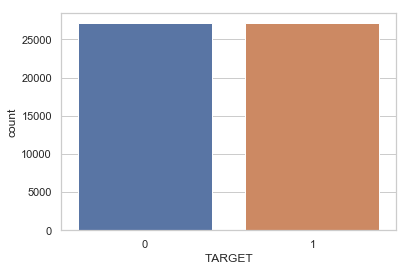

In [33]:
ax = sns.countplot(x=Y)

### Obs:Agora as Classes estão Balanceadas, Exemplos Iguais de Ambas as Classes

## Pré-processamento

### Usando Min-Max-Scaler para dimensionar as colunas do dataset

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))
cols=X.columns
train=X
scaler.fit(train)
scaled_data=pd.DataFrame(scaler.transform(train),columns=cols)
df_test=pd.DataFrame(scaler.transform(df_test),columns=cols)

## Análise de Correlação

### Visualizando as distribuições dos recursos

In [35]:
#pd.plotting.scatter_matrix(good_data, alpha = 0.3, figsize = (15,10), diagonal = 'kde');

### A matriz de dispersão mostra o coeficiente de correlação de person entre os recursos

In [36]:
#sns.heatmap(good_data.corr().round(3),annot=True)

### Aplicando PCA para reduzir a dimensionalidade do Dataset

In [37]:
n_components=50
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')
pca = pca.fit(scaled_data)

reduced_data = pd.DataFrame(pca.transform(scaled_data))

In [38]:
good_data=pd.concat([reduced_data,Y],axis=1)
df_test = pd.DataFrame(pca.transform(df_test))

## Separando os Dados em Treino e Testes

In [39]:
X_train, X_test, y_train, y_test = train_test_split(good_data.drop('TARGET',axis=1), 
                                                    good_data['TARGET'], 
                                                    test_size = 0.2, 
                                                    stratify=good_data['TARGET'],
                                                    random_state = 0)

print("Conjunto de Treinamento tem {} amostras.".format(X_train.shape[0]))
print("Conjunto de Testes tem {} amostras.".format(X_test.shape[0]))

Conjunto de Treinamento tem 43400 amostras.
Conjunto de Testes tem 10850 amostras.


## Modelagem Preditiva

### Árvores de Decisão

In [40]:
model_1 = DecisionTreeClassifier(random_state=44)
model_1.fit(X_train,y_train.values)
predictions_1=model_1.predict(X_test)


In [41]:
beta=10 # favorece mais o recall
accuracy_1=accuracy_score(y_test.values, predictions_1)
fB_score_1=fbeta_score(y_test.values, predictions_1,beta,average='binary') #[None, 'micro', 'macro', 'weighted', 'samples']
recall_score_1=recall_score(y_test.values, predictions_1, average='binary')
precision_score_1=precision_score(y_test.values, predictions_1, average='binary')
tn_1, fp_1, fn_1, tp_1=confusion_matrix(y_test.values, predictions_1).ravel()

print('Acurácia para o conjunto de testes para a árvore de decisão não otimizada: {:.3f}  %'.format(accuracy_1*100))
print('F10 Score para o conjunto de testes para a árvore de decisão não otimizada: {:.3f}  %'.format(fB_score_1*100))
print('Recall(sensibilidade) para o conjunto de testes para a árvore de decisão não otimizada: {:.3f}  %'.format(recall_score_1*100))
print('Precisão para o conjunto de testes para a árvore de decisão não otimizada: {:.3f}  %'.format(precision_score_1*100))
print('Verdadeiros negativos para o conjunto de testes para a árvore de decisão não otimizada: {0}'.format(tn_1))
print('Falsos positivos para o conjunto de testes para a árvore de decisão não otimizada: {0}'.format(fp_1))
print('Falsos negativos para o conjunto de testes para a árvore de decisão não otimizada: {0}'.format(fn_1))
print('Verdadeiros positivos para o conjunto de testes para a árvore de decisão não otimizada: {0}'.format(tp_1))

Acurácia para o conjunto de testes para a árvore de decisão não otimizada: 91.134  %
F10 Score para o conjunto de testes para a árvore de decisão não otimizada: 92.979  %
Recall(sensibilidade) para o conjunto de testes para a árvore de decisão não otimizada: 93.014  %
Precisão para o conjunto de testes para a árvore de decisão não otimizada: 89.643  %
Verdadeiros negativos para o conjunto de testes para a árvore de decisão não otimizada: 4842
Falsos positivos para o conjunto de testes para a árvore de decisão não otimizada: 583
Falsos negativos para o conjunto de testes para a árvore de decisão não otimizada: 379
Verdadeiros positivos para o conjunto de testes para a árvore de decisão não otimizada: 5046


C:\Users\italo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass beta=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


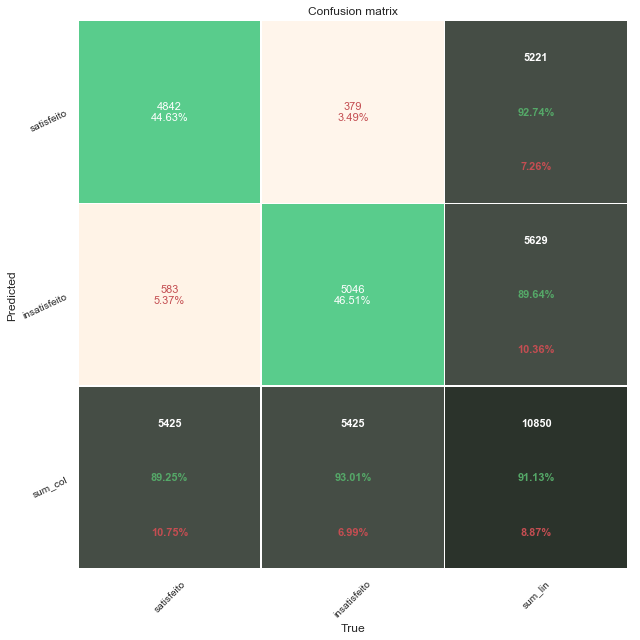

In [42]:
plot_confusion_matrix_from_data(y_test.values, predictions_1, columns=['satisfeito','insatisfeito'], annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[2,2], show_null_values=0, pred_val_axis='lin')

### Suport Vector Machine

In [43]:
model_2 = SVC(kernel='rbf',random_state=44)
model_2.fit(X_train,y_train.values)
predictions_2=model_2.predict(X_test)

In [44]:
beta=10 # favorece mais o recall
accuracy_2=accuracy_score(y_test.values, predictions_2)
fB_score_2=fbeta_score(y_test.values, predictions_2,beta,average='binary') #[None, 'micro', 'macro', 'weighted', 'samples']
recall_score_2=recall_score(y_test.values, predictions_2, average='binary')
precision_score_2=precision_score(y_test.values, predictions_2, average='binary')
tn_2, fp_2, fn_2, tp_2=confusion_matrix(y_test.values, predictions_2).ravel()

print('Acurácia para o conjunto de testes para a suport vector machine não otimizada: {:.3f}  %'.format(accuracy_2*100))
print('F10 Score para o conjunto de testes para a suport vector machine não otimizada: {:.3f}  %'.format(fB_score_2*100))
print('Recall(sensibilidade) para o conjunto de testes para a suport vector machine não otimizada: {:.3f}  %'.format(recall_score_2*100))
print('Precisão para o conjunto de testes para a suport vector machine não otimizada: {:.3f}  %'.format(precision_score_2*100))
print('Verdadeiros negativos para o conjunto de testes para a suport vector machine não otimizada: {0}'.format(tn_2))
print('Falsos positivos para o conjunto de testes para a suport vector machine não otimizada: {0}'.format(fp_2))
print('Falsos negativos para o conjunto de testes para a suport vector machine não otimizada: {0}'.format(fn_2))
print('Verdadeiros positivos para o conjunto de testes para a suport vector machine não otimizada: {0}'.format(tp_2))

Acurácia para o conjunto de testes para a suport vector machine não otimizada: 88.756  %
F10 Score para o conjunto de testes para a suport vector machine não otimizada: 91.000  %
Recall(sensibilidade) para o conjunto de testes para a suport vector machine não otimizada: 91.041  %
Precisão para o conjunto de testes para a suport vector machine não otimizada: 87.062  %
Verdadeiros negativos para o conjunto de testes para a suport vector machine não otimizada: 4691
Falsos positivos para o conjunto de testes para a suport vector machine não otimizada: 734
Falsos negativos para o conjunto de testes para a suport vector machine não otimizada: 486
Verdadeiros positivos para o conjunto de testes para a suport vector machine não otimizada: 4939


C:\Users\italo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass beta=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


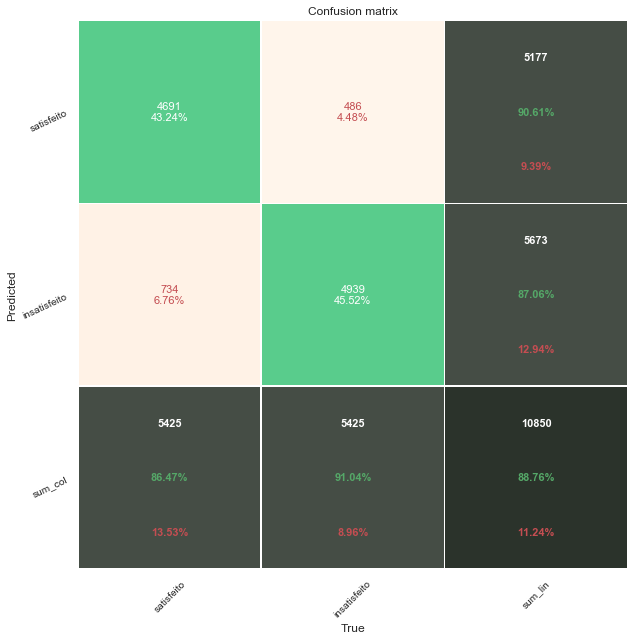

In [45]:
plot_confusion_matrix_from_data(y_test.values, predictions_2, columns=['satisfeito','insatisfeito'], annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[2,2], show_null_values=0, pred_val_axis='lin')

In [46]:
model_3 = xgb.XGBClassifier()

model_3.fit(X_train,y_train.values)
predictions_3=model_3.predict(X_test)

beta=10 # favorece mais o recall
accuracy_3=accuracy_score(y_test.values, predictions_3)
fB_score_3=fbeta_score(y_test.values, predictions_3,beta,average='binary') #[None, 'micro', 'macro', 'weighted', 'samples']
recall_score_3=recall_score(y_test.values, predictions_3, average='binary')
precision_score_3=precision_score(y_test.values, predictions_3, average='binary')
tn_3, fp_3, fn_3, tp_3=confusion_matrix(y_test.values, predictions_3).ravel()

C:\Users\italo\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:17:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\italo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass beta=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [47]:
print('Acurácia para o conjunto de testes para o XGBoost não otimizado: {:.3f}  %'.format(accuracy_3*100))
print('F10 Score para o conjunto de testes para o XGBoost não otimizado: {:.3f}  %'.format(fB_score_3*100))
print('Recall(sensibilidade) para o conjunto de testes para o XGBoost não otimizado: {:.3f}  %'.format(recall_score_3*100))
print('Precisão para o conjunto de testes para o XGBoost não otimizado: {:.3f}  %'.format(precision_score_3*100))
print('Verdadeiros negativos para o conjunto de testes para o XGBoost não otimizado: {0}'.format(tn_3))
print('Falsos positivos para o conjunto de testes para o XGBoost não otimizado: {0}'.format(fp_3))
print('Falsos negativos para o conjunto de testes para o XGBoost não otimizado: {0}'.format(fn_3))
print('Verdadeiros positivos para o conjunto de testes para o XGBoost não otimizado: {0}'.format(tp_3))

Acurácia para o conjunto de testes para o XGBoost não otimizado: 92.286  %
F10 Score para o conjunto de testes para o XGBoost não otimizado: 95.695  %
Recall(sensibilidade) para o conjunto de testes para o XGBoost não otimizado: 95.760  %
Precisão para o conjunto de testes para o XGBoost não otimizado: 89.538  %
Verdadeiros negativos para o conjunto de testes para o XGBoost não otimizado: 4818
Falsos positivos para o conjunto de testes para o XGBoost não otimizado: 607
Falsos negativos para o conjunto de testes para o XGBoost não otimizado: 230
Verdadeiros positivos para o conjunto de testes para o XGBoost não otimizado: 5195


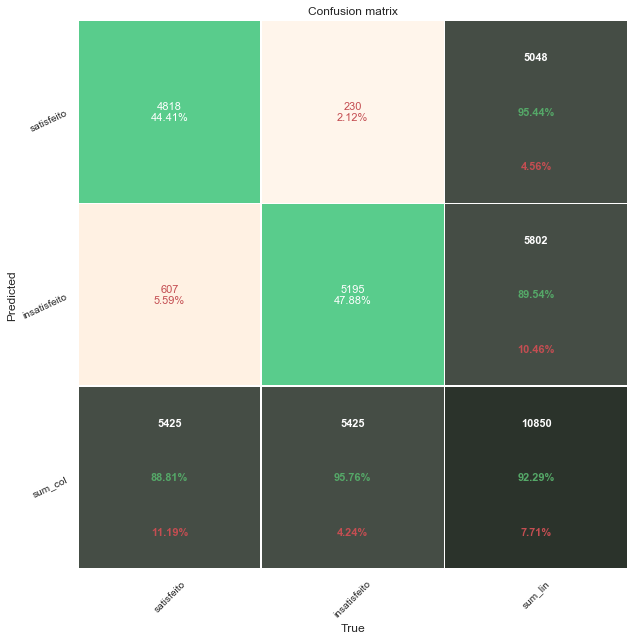

In [48]:
plot_confusion_matrix_from_data(y_test.values, predictions_3, columns=['satisfeito','insatisfeito'], annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[2,2], show_null_values=0, pred_val_axis='lin')

### Regressão Logística

In [49]:
model_4 = LogisticRegression(random_state=44)

model_4.fit(X_train,y_train.values)
predictions_4=model_4.predict(X_test)

C:\Users\italo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
beta=10 # favorece mais o recall
accuracy_4=accuracy_score(y_test.values, predictions_4)
fB_score_4=fbeta_score(y_test.values, predictions_4,beta,average='binary') #[None, 'micro', 'macro', 'weighted', 'samples']
recall_score_4=recall_score(y_test.values, predictions_4, average='binary')
precision_score_4=precision_score(y_test.values, predictions_4, average='binary')
tn_4, fp_4, fn_4, tp_4=confusion_matrix(y_test.values, predictions_4).ravel()

C:\Users\italo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass beta=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [51]:
print('Acurácia para o conjunto de testes para a regressão logística não otimizado: {:.3f}  %'.format(accuracy_4*100))
print('F10 Score para o conjunto de testes para a regressão logística não otimizado: {:.3f}  %'.format(fB_score_4*100))
print('Recall(sensibilidade) para o conjunto de testes para a regressão logística não otimizado: {:.3f}  %'.format(recall_score_4*100))
print('Precisão para o conjunto de testes para a regressão logística não otimizado: {:.3f}  %'.format(precision_score_4*100))
print('Verdadeiros negativos para o conjunto de testes para a regressão logística não otimizado: {0}'.format(tn_4))
print('Falsos positivos para o conjunto de testes para a regressão logística não otimizado: {0}'.format(fp_4))
print('Falsos negativos para o conjunto de testes para a regressão logística não otimizado: {0}'.format(fn_4))
print('Verdadeiros positivos para o conjunto de testes para a regressão logística não otimizado: {0}'.format(tp_4))

Acurácia para o conjunto de testes para a regressão logística não otimizado: 87.327  %
F10 Score para o conjunto de testes para a regressão logística não otimizado: 89.563  %
Recall(sensibilidade) para o conjunto de testes para a regressão logística não otimizado: 89.604  %
Precisão para o conjunto de testes para a regressão logística não otimizado: 85.702  %
Verdadeiros negativos para o conjunto de testes para a regressão logística não otimizado: 4614
Falsos positivos para o conjunto de testes para a regressão logística não otimizado: 811
Falsos negativos para o conjunto de testes para a regressão logística não otimizado: 564
Verdadeiros positivos para o conjunto de testes para a regressão logística não otimizado: 4861


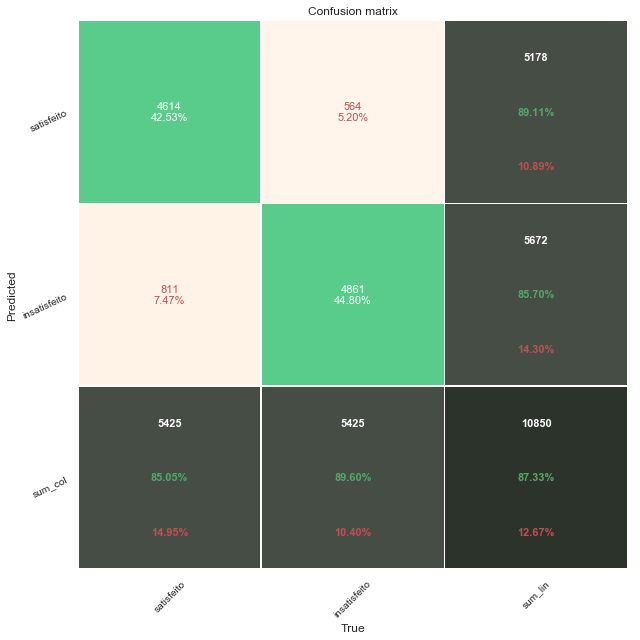

In [52]:
plot_confusion_matrix_from_data(y_test.values, predictions_4, columns=['satisfeito','insatisfeito'], annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[2,2], show_null_values=0, pred_val_axis='lin')

### Naive Bayes

In [53]:
model_5 = GaussianNB()
model_5.fit(X_train,y_train.values)
predictions_5=model_5.predict(X_test)

In [54]:
beta=10 # favorece mais o recall
accuracy_5=accuracy_score(y_test.values, predictions_5)
fB_score_5=fbeta_score(y_test.values, predictions_5,beta,average='binary') #[None, 'micro', 'macro', 'weighted', 'samples']
recall_score_5=recall_score(y_test.values, predictions_5, average='binary')
precision_score_5=precision_score(y_test.values, predictions_5, average='binary')
tn_5, fp_5, fn_5, tp_5=confusion_matrix(y_test.values, predictions_5).ravel()

C:\Users\italo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass beta=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [55]:
print('Acurácia para o conjunto de testes para o Naive Bayes não otimizado: {:.3f}  %'.format(accuracy_5*100))
print('F10 Score para o conjunto de testes para o Naive Bayes não otimizado: {:.3f}  %'.format(fB_score_5*100))
print('Recall(sensibilidade) para o conjunto de testes para o Naive Bayes não otimizado: {:.3f}  %'.format(recall_score_5*100))
print('Precisão para o conjunto de testes para o Naive Bayes não otimizado: {:.3f}  %'.format(precision_score_5*100))
print('Verdadeiros negativos para o conjunto de testes para o Naive Bayes não otimizado: {0}'.format(tn_5))
print('Falsos positivos para o conjunto de testes para o Naive Bayes não otimizado: {0}'.format(fp_5))
print('Falsos negativos para o conjunto de testes para o Naive Bayes não otimizado: {0}'.format(fn_5))
print('Verdadeiros positivos para o conjunto de testes para o Naive Bayes não otimizado: {0}'.format(tp_5))

Acurácia para o conjunto de testes para o Naive Bayes não otimizado: 78.157  %
F10 Score para o conjunto de testes para o Naive Bayes não otimizado: 92.687  %
Recall(sensibilidade) para o conjunto de testes para o Naive Bayes não otimizado: 92.959  %
Precisão para o conjunto de testes para o Naive Bayes não otimizado: 71.725  %
Verdadeiros negativos para o conjunto de testes para o Naive Bayes não otimizado: 3437
Falsos positivos para o conjunto de testes para o Naive Bayes não otimizado: 1988
Falsos negativos para o conjunto de testes para o Naive Bayes não otimizado: 382
Verdadeiros positivos para o conjunto de testes para o Naive Bayes não otimizado: 5043


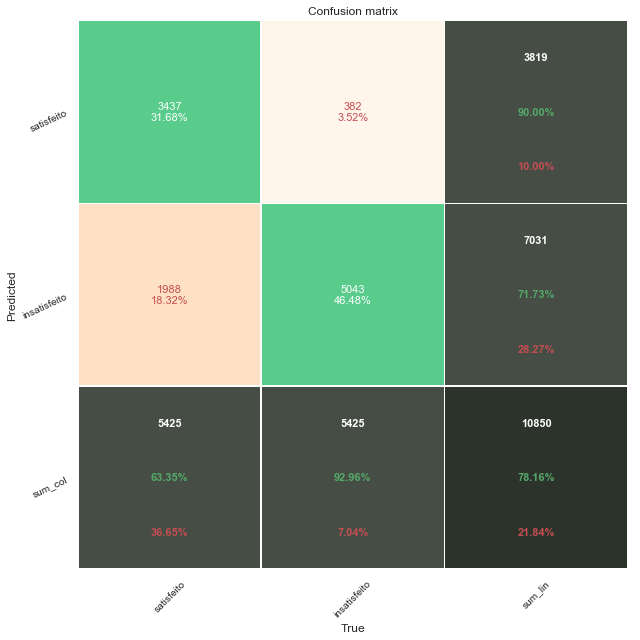

In [56]:
plot_confusion_matrix_from_data(y_test.values, predictions_5, columns=['satisfeito','insatisfeito'], annot=True, cmap="Oranges",
      fmt='.2f', fz=11, lw=0.5, cbar=False, figsize=[2,2], show_null_values=0, pred_val_axis='lin')

## Salvando os Resultados para Submissão

In [57]:
best_model=model_3
predictions=model_5.predict(df_test)

In [58]:
test_path='data/test.csv'

test_data=pd.read_csv(test_path)

In [59]:
test_data['ID']
preds=pd.concat([test_data['ID'],pd.DataFrame(predictions)],axis=1)

In [60]:
preds.columns=['ID','TARGET']

In [61]:
preds.to_csv('final_predictions.csv',index=False)